# 2015 Temperature Record Breakers

This graph represents the top and bottom temperature records from 2005 to 2014 by day of year and the times in 2015 that this record was broken.

The data comes from The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as tkr

In [3]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_weather_data():
    df = pd.read_csv('570fb18cde0c9766865e6670ce2c11b0562a81415c535e51441176a2.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.drop(df[(df['Date'].dt.month == 2) & (df['Date'].dt.day == 29)].index, inplace=True)
    df.sort_values('Date', inplace=True)
    return df

In [4]:
def between_dates(df, init, end):
    return df[df['Date'] >= init][df['Date'] <= end]

In [5]:
def get_max_min_by_day():
    df = read_weather_data()
    
    df = between_dates(df, '2005-01-01', '2005-12-31')
    
    df = df.drop(['ID'], axis=1)
    
    #df_max = df[df['Element'] == 'TMAX'].groupby(df['Date'].map(lambda x: x.strftime('%m-%d'))).agg({'Data_Value': 'max'})
    df_max = df[df['Element'] == 'TMAX'].groupby(df['Date'].dt.dayofyear).agg({'Data_Value': 'max'})
    
    df_max.columns = ['Max']

    #df_min = df[df['Element'] == 'TMIN'].groupby(df['Date'].map(lambda x: x.strftime('%m-%d'))).agg({'Data_Value': 'min'})
    df_min = df[df['Element'] == 'TMIN'].groupby(df['Date'].dt.dayofyear).agg({'Data_Value': 'min'})
    df_min.columns = ['Min']
    
    df = df_max.join(df_min, how='inner')
    
    return df

get_max_min_by_day()

,Max,Min
Date,,
1,370,154
2,380,174
3,375,118
4,381,122
5,432,121
6,415,133
7,415,145
8,427,132
9,405,203


In [6]:
import matplotlib.dates as mdates

def plot_min_temp():
    df = get_max_min_by_day()
    days = df.index
    
    # return df.tail()
    plt.figure()
    plt.plot(days, df['Min'], '-', color='lightskyblue', label='Min temperature (2005-2014)')
    plt.plot(days, df['Max'], '-', color='darksalmon', label='Max temperature (2005-2014)')
    
    plt.legend(loc='lower left')
    
    cf = plt.gcf()
    cf.set_size_inches(9, 6)
    
    plt.gca().fill_between(range(len(days)), 
                       df['Min'], df['Max'], 
                       facecolor='grey', 
                       alpha=0.2)

In [7]:
def get_max_min_2015():
    df = read_weather_data()
    
    df = between_dates(df, '2015-01-01', '2015-12-31')
    
    df = df.drop(['ID'], axis=1)
    
    df_max = df[df['Element'] == 'TMAX'].groupby(df['Date'].dt.dayofyear).agg({'Data_Value': 'max'})
    df_max.columns = ['Max 2015']

    df_min = df[df['Element'] == 'TMIN'].groupby(df['Date'].dt.dayofyear).agg({'Data_Value': 'min'})
    df_min.columns = ['Min 2015']
    
    df = df_max.join(df_min, how='inner')
    
    return df


In [8]:
def get_2015_records():
    df_2015 = get_max_min_2015()
    df_before = get_max_min_by_day()
    df = df_before.join(df_2015, how='inner')
    
    df['Max Record'] = df['Max'] < df['Max 2015']
    df['Min Record'] = df['Min'] > df['Min 2015']
    
    df_min = df[df['Min Record'] == True][['Min 2015']]
    df_max = df[df['Max Record'] == True][['Max 2015']]
    
    df_records = df_min.merge(df_max, how='outer', left_index=True, right_index=True)
    
    return df_records

In [9]:
def plot_scatterplot_records():
    df = get_2015_records()
    plt.scatter(df.index, df['Min 2015'], s=10, c='blue', label='Min temperature 2015')
    plt.scatter(df.index, df['Max 2015'], s=10, c='red', label='Max temperature 2015')
    plt.legend(loc='lower left')

<IPython.core.display.Javascript object>


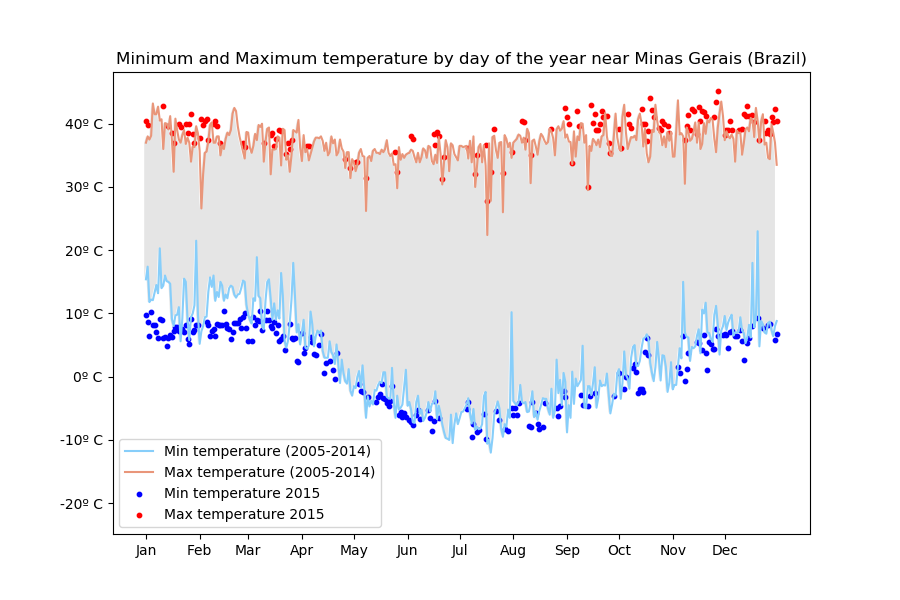

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [10]:
def plot_graph():
    plot_min_temp()
    plot_scatterplot_records()
    
    plt.title('Minimum and Maximum temperature by day of the year near Minas Gerais (Brazil)')
    
    ax = plt.gca()
    
    yfmt = tkr.FuncFormatter(lambda x, pos: '{0:g}º C'.format(x / 10))
    plt.gca().yaxis.set_major_formatter(yfmt)
    
    start, end = plt.gca().get_xlim()
    
    ax.xaxis.set_ticks(np.arange(0, 365, 30.4166))
    
    month_limits = [1,32,60,91,121,152,182,213,244,274,305,335]
    months = [d.strftime('%b') for d in pd.date_range('2015-01-01', '2015-12-31', freq='M')]
    
    ax.get_xaxis().set_ticks(month_limits)
    ax.set_xticklabels(months)
    
    bottom, top = plt.ylim()  # return the current ylim
    plt.ylim(bottom=bottom-100)     # set the ylim to bottom, top
    
    plt.savefig('2015-temp-record-breakers.jpg')
    
plot_graph()
    